## Objective

Redefine ImSig using single cell data

### Load packages

In [27]:
import pandas as pd
import numpy as np
import os
import magic

# Plotting and miscellaneous imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
# Guide
# http://nbviewer.jupyter.org/github/pkathail/magic/blob/develop/notebooks/Magic_single_cell_RNAseq.ipynb

### Import data

In [48]:
# Set Working directory
WD = 'L:/Extended M drive/ImSIg/Single cell validation/melanoama'
os.chdir(WD)
# Import data
mel = np.transpose(pd.read_csv('melanoma_expression.csv', index_col=0))
mel_sc = magic.mg.SCData(mel, 'sc-seq')

In [51]:
mel_sc1

SCData: 4645 cells x 23686 genes

data_prefix=True
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=None
magic=None
metadata=True
normalized=True
pca=None
tsne=None

### Data preprocessing

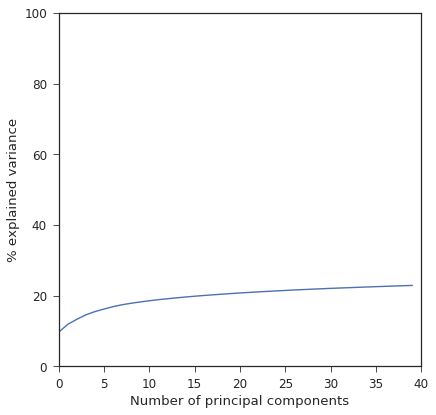

In [55]:
fig, ax = mel_sc.plot_pca_variance_explained(n_components=40, random=True)

### MAGIC imputation

In [76]:
# MAGIC
mel_sc.run_magic(n_pca_components=100, random_pca=True, t=6, k=30, 
                 ka=10, epsilon=1, rescale_percent=99)

doing PCA
Computing distances
Autotuning distances
Computing kernel
MAGIC: W_t = W^t
MAGIC: data_new = W_t * data


C:\Anaconda3\lib\site-packages\magic-0.0-py3.6.egg\magic\MAGIC_core.py:78: RuntimeWarning: invalid value encountered in true_divide


In [74]:
# Save magic file
mel_magic = mel_sc.magic

In [79]:
mel_sc.magic.head(5)

AttributeError: 'SCData' object has no attribute 'head'

In [75]:
mel_magic.to_csv('mel_magic.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

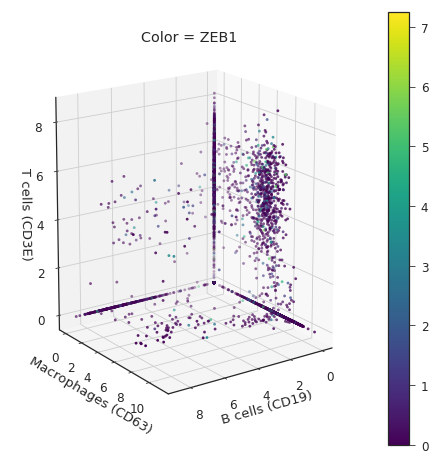

In [77]:
# Before Magic
fig, ax = mel_sc.scatter_gene_expression(['CD19', 'CD63', 'CD3E'], color='ZEB1')
ax.set_xlabel('B cells (CD19)')
ax.set_ylabel('Macrophages (CD63)')
ax.set_zlabel('T cells (CD3E)')

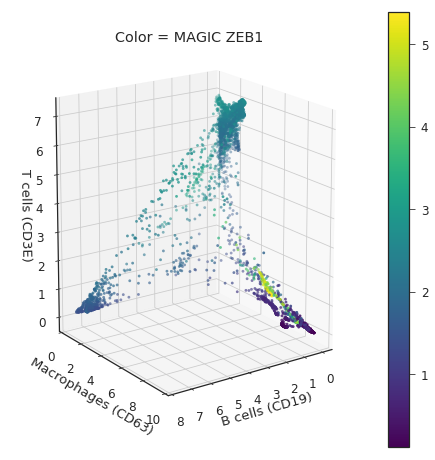

In [78]:
# After Magic
fig, ax = mel_sc.magic.scatter_gene_expression(['MAGIC CD19', 'MAGIC CD63', 'MAGIC CD3E'], color='MAGIC ZEB1')
ax.set_xlabel('B cells (CD19)')
ax.set_ylabel('Macrophages (CD63)')
ax.set_zlabel('T cells (CD3E)')

In [80]:
mel_sc.run_tsne()

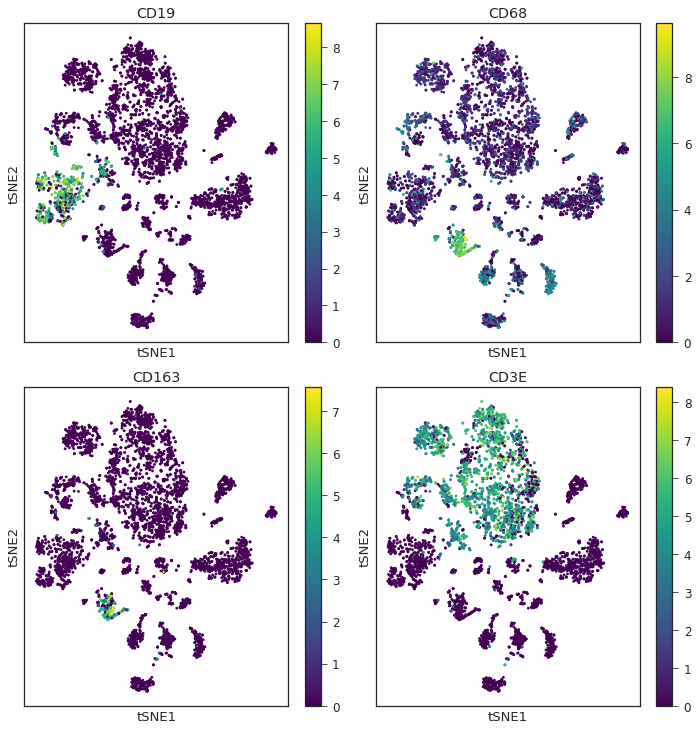

In [84]:
# Before magic
fig, ax = mel_sc.plot_gene_expression(genes=['CD19', 'CD68', 'CD163', 'CD3E'])

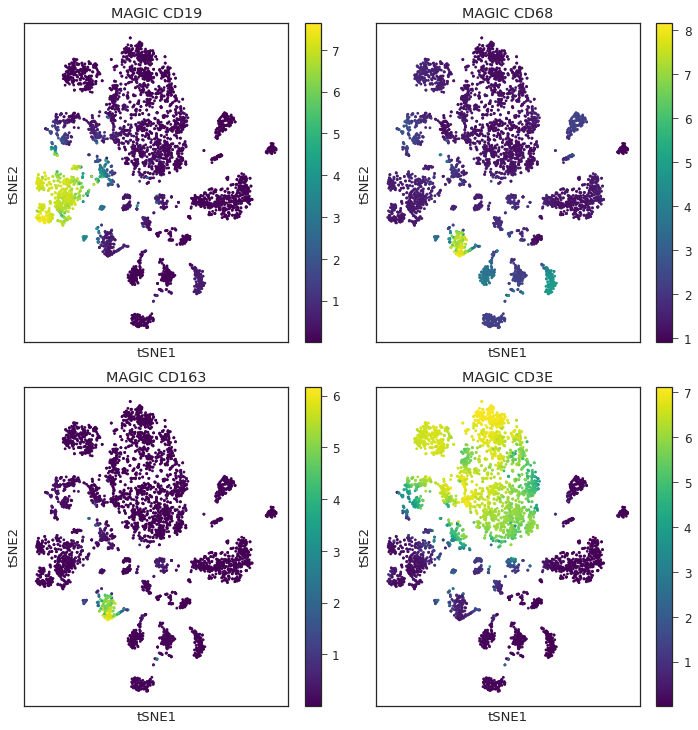

In [83]:
# After Magic
colors = {'MAGIC CD19': mel_sc.magic.data['MAGIC CD19'],
          'MAGIC CD68': mel_sc.magic.data['MAGIC CD68'],
          'MAGIC CD163': mel_sc.magic.data['MAGIC CD163'],
          'MAGIC CD3E': mel_sc.magic.data['MAGIC CD3E']}
fix, ax = mel_sc.plot_gene_expression(genes=colors)

In [85]:
mat = np.transpose(mel_sc.magic.data)
mat.to_csv('mel_magic.csv')

In [ ]:
mat.round(2)
mat.to_csv('mel_magic_t.csv')

In [86]:
mat = np.transpose(mel_sc.magic.data)
mat.to_csv('mel_magic_t.csv')

In [ ]:
mat.head(5)